# 6. Métricas y medidas de performance en problemas de clasificación

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Etiquetas de Ejemplo

Clasificación binaria probabilística:

In [2]:
y_true = np.array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0])
y_pred_proba = np.array([.99, .98, .72, .70, .65, .51, .39, .24, .11, .01])

Clasificación binaria determinista:

In [3]:
threshold = 0.5 # valor standard, lo puedo modificar
y_pred = (y_pred_proba >= threshold).astype(int)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

Clasificación multiclase determinista:

In [4]:
y_true2 = ["cat", "ant", "cat", "cat", "ant", "bird"] # etiquetas verdaderas
y_pred2 = ["ant", "ant", "cat", "cat", "ant", "cat"] # etiquetas que me da un modelo y quiero evaluar

## Precision, Recall y F1

La precision es la cantidad de positivos propuestos por el modelo que fueron correctos:

$$Precision = \frac{|Train \cap Test|}{|Train|} = \frac{TP}{TP + FP}$$

La recall es la cantidad de positivos correctos que fueron encontrados por el modelo:

$$Recall = \frac{|Train \cap Test|}{|Test|} = \frac{TP}{TP + FN}$$

$$F_1 = \frac{2 * Precision * Recall}{Precision + Recall}$$

Para clasificación multiclase, se puede calcular una métrica por clase. Luego, las métricas se pueden promediar para obtener resultados "macro".
Para obtener resultados "micro", se hacen primero cálculos globales para TP, FP, TN, FN y luego se calcula como un problema binario.

Podemos usar sklearn para calcularlas:

In [5]:
y_true, y_pred

(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0]))

In [6]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred) # precision= 4/6

0.6666666666666666

In [7]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred) # recall= 4/5

0.8

In [8]:
from sklearn.metrics import f1_score
# Fi = Medía Armónica entre las 2 métricas (Recall y Precision)
f1_score(y_true, y_pred)

0.7272727272727272

## Reporte de Clasificación

- [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

En clasificación binaria:

In [9]:
y_true, y_pred

(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0]))

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



En clasificación multiclase:

In [11]:
print(classification_report(y_true2, y_pred2))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird       0.00      0.00      0.00         1
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



C:\Users\W10\miniconda3\envs\diplodatos-ayvd\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Matrices de Confusión

Usamos [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):


In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_true, y_pred)

array([[3, 2],
       [1, 4]], dtype=int64)

In [14]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

En multiclase:

In [15]:
cm = confusion_matrix(y_true2, y_pred2)
cm

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

Podemos usar [plot_confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) pero requiere el clasificador. Definimos nuestra propia versión:

In [38]:
# Utils

# Utils: son funciones guardadas en un archivo aparte. 
# Puedo pegar las funciones aca o llamarlo si está guardado en el mismo lugar que la notebook

import numpy as np
import matplotlib.pyplot as plt
import itertools


def plot_decision_boundary(model, X, y):
    X = X.T
    y = y.T

    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean)
    plt.scatter(X[0, y==1], X[1, y==1], color="dodgerblue", edgecolors='k', label="1")
    plt.scatter(X[0, y==-1], X[1, y==-1], color="tomato", edgecolors='k', label="-1")
    plt.legend()


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')

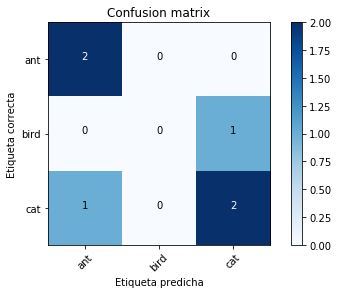

In [39]:
plot_confusion_matrix(cm, ['ant', 'bird', 'cat'])

## Curvas ROC

Usamos [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) para obtener los puntos y graficamos:

In [18]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_true, y_pred_proba, drop_intermediate=True)

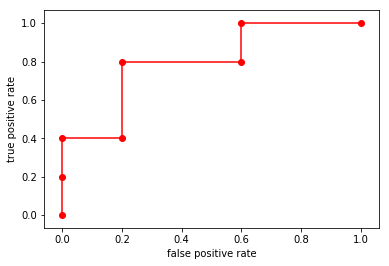

In [19]:
plt.plot(fpr, tpr, color="red")
plt.scatter(fpr, tpr, color="red")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [20]:
tpr[4], fpr[4], threshold[4]

(0.8, 0.2, 0.65)

Calculamos el área bajo la curva con [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html):

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred_proba)

0.8

## Curvas PR (Precision/Recall)

Usamos [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) para obtener los puntos y graficamos:

In [22]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_true, y_pred_proba)

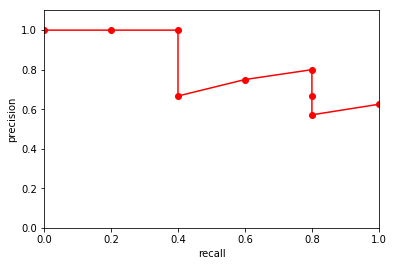

In [23]:
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.plot(recall, precision, color="red")
plt.scatter(recall, precision, color="red")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [ ]:
# cuando el modelo se vuelve mas conservador, uno propone menos cosas... es menos propositivo.


In [24]:
precision[-6], recall[-6], threshold[-6]

(0.8, 0.8, 0.51)

In [25]:
precision[-5], recall[-5], threshold[-5]

(0.75, 0.6, 0.65)

In [26]:
threshold

array([0.24, 0.39, 0.51, 0.65, 0.7 , 0.72, 0.98, 0.99])